# Introduction to Importing Data, Using Tables and Creating Graphs 

## The Jupyter Notebook

*If you run into errors, check the [common errors](https://docs.google.com/document/d/1-LUvfYYI5UtjYiZerCGIBNgzkaJHNxl4530tgh37uYs/edit?usp=sharing) Google doc first.*

First of all, note that this page is divided into what are called "cells". For example, the following cell is a "code cell" where you will write your code. You'll see a `In [ ]:` next to each cell for code, which is a counter for the cells you have run. You can navigate cells by clicking on them or by using the up and down arrows. Cells will be highlighted as you navigate them.

In [1]:
# this is a code cell

### Executing cells

<p></p>

<div class="alert alert-info">
You can execute cells with <b><code>Ctrl-Enter</code></b> (which will run the cell and keep the same cell selected), or <b><code>Shift-Enter</code></b> (which will run the cell and then select the next cell).
</div>

Try running the following cell and see what it prints out:

In [2]:
print("Hello world!")

Hello world!


In [3]:
10 + 10

20

In [4]:
(10 + 10) / 5

4.0

Now run this cell to `import` some code we'll use today, nothing will `print` out, don't worry!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline 
plt.style.use("fivethirtyeight")

### Importing

In data analytics, there is almost always a file holding your data that already exists. There are thousands of databases online that contain information on topics from all domains. In general, to import data from a file, we write:

```python
Table.read_table("file_name")
```

Most often, these file names end in `.csv` to show the data format. `.csv` format is popular for spreadsheets and can be imported/exported from programs such as Microsoft Excel, OpenOffice Calc, or Google spreadsheets. 
 
An example is shown below using [U.S. Census data](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv). 

In [10]:
!pwd

/Users/chrispyles/GitHub/modules-textbook/content/psych


In [11]:
Table.read_table("data/nc-est2015-agesex-res.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


That's a lot of information. As you can see from the labels on top, this table shows Biological Sex (0=total, 1=male, 2=female), Age,  2010 Census Information, and predictions for U.S. population for the next five years. 

## Using Tables

We can make criteria to cut down tables. Accessing only the rows, columns, or values specfic to our purpose makes information easier understood. Analysis and conclusions can be made when data is more digestible. 

We need to access the census table above and name it for further use. We assign the table to a variable so that we can reference it later!

In [12]:
census_data = Table.read_table("data/nc-est2015-agesex-res.csv")
census_data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


This notebook can calculate how large this table is with two functions: num_rows and num_columns. The general form for these functions are table.num_rows and table.num_columns. 

Let's use these on the table above. 

In [13]:
census_data.num_rows

306

In [14]:
census_data.num_columns

10

That's a 306 x 10 table! We can first start to cut down this table using only some columns. Let's only include biological sex, age and the estimated base for 2010 census data. 

There are two methods to make a table with select columns included. We could either use the 'select' function or the 'drop' function. 

- `select` can create a new table with only the columns indicated in the parameters 
- `drop` can create a new table with columns NOT indicated in the parameters


Here's an example of two equal codes: (keep in mind that we assign each new table to a new variable, to make organization easier). 

In [15]:
select_census_data = census_data.select("SEX", "AGE", "ESTIMATESBASE2010")
select_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


In [16]:
drop_census_data = census_data.drop("CENSUS2010POP","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015")
drop_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


As you can see underneath the table, there are still 296 rows omitted! Our next step is to only include non-gendered data AKA data where SEX=0, neither male or female specific. 

To do this, we need to use a new function `where`. The general form of this function is:

```python
table_name.where(column_name, predicate)
```

To cut our table down to only include `sex=0`, we may use the predicate `are.equal_to()`. Note that we are assigning the new table to a new variable. We are referencing the table stored in an older variable (`select_census_data`), and modifying it. That modification is what is stored in the new variable. 

In [17]:
new_census_data = select_census_data.where("SEX", are.equal_to(0))
new_census_data

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,1,3978090
0,2,4096939
0,3,4119051
0,4,4063186
0,5,4056872
0,6,4066412
0,7,4030594
0,8,4046497
0,9,4148369


There are still 92 rows omitted! Let's take every 10th entry to cut this table down a little more. 

To do this we need to use the `take` function. The `take` function creates a new table with rows from the original table whose indices(row number) are given. In Python, indices start at 0! 

Here's taking every 10th entry. Inside of the take parentheses is a Python list of numbers from 0 to 90, increasing by 10s. This indicates exactly which rows we want to keep (every 10th row).

In [18]:
census_10_year = new_census_data.take([0,10,20,30,40,50,60,70,80,90])
census_10_year

SEX,AGE,ESTIMATESBASE2010
0,0,3944160
0,10,4172559
0,20,4519556
0,30,4285877
0,40,4383450
0,50,4660457
0,60,3621214
0,70,2043178
0,80,1308608
0,90,435695


Now that sex is all the same, we can drop that column. 

In [19]:
final_census_table = census_10_year.drop("SEX")
final_census_table

AGE,ESTIMATESBASE2010
0,3944160
10,4172559
20,4519556
30,4285877
40,4383450
50,4660457
60,3621214
70,2043178
80,1308608
90,435695


---

### Tables Essentials!

For your reference, here's a table of useful `Table` functions:

|Name|Example|Purpose|
|-|-|-|
|`Table`|`Table()`|Create an empty table, usually to extend with data|
|`Table.read_table`|`Table.read_table("my_data.csv")`|Create a table from a data file|
|`with_columns`|`tbl = Table().with_columns("N", np.arange(5), "2*N", np.arange(0, 10, 2))`|Create a copy of a table with more columns|
|`column`|`tbl.column("N")`|Create an array containing the elements of a column|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|
|`take`|`tbl.take(np.arange(0, 6, 2))`|Create a copy of the table with only the rows whose indices are in the given array|
|`join`|`tbl1.join("shared_column_name", tbl2)`|Join together two tables with a common column name
|`are.equal_to()`|`tbl.where("SEX", are.equal_to(0))`|find values equal to that indicated|
|`are.not_equal_to()`|`tbl.where("SEX", are.not_equal_to(0))` | find values not including the one indicated|
|`are.above()`| `tbl.where("AGE", are.above(30))` | find values greater to that indicated|
|`are.below()`| `tbl.where("AGE", are.below(40))` | find values less than that indicated |
|`are.between()`| `tbl.where("SEX", are.between(18, 60))` | find values between the two indicated |

---

## Visualizations 

Now that we have a manageable table we can start making visualizations! Due to the numerical nature of the census table above, let's first try a scatter plot. 

To create a scatter plot, we need to use the `scatter()` function. The general form is:

```python
table.scatter("column for x axis", "column for y axis")
```

An example is shown below:

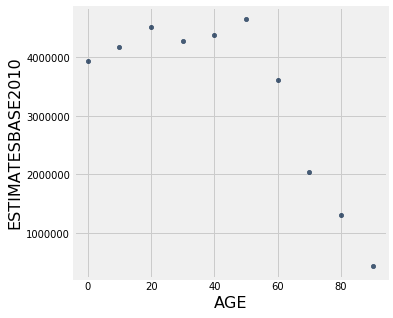

In [20]:
final_census_table.scatter("AGE", "ESTIMATESBASE2010") 

With this data, we can also make a line plot. To do this, we need to use the `plot()` function. This works a lot like `scatter()` where the general form is:

```python
table.plot("x column", "y column")
```

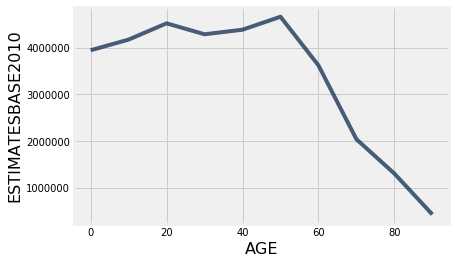

In [21]:
final_census_table.plot("AGE", "ESTIMATESBASE2010") 

Though a bar may be better. Bar graphs follow the same formula as scatter plots and line graphs above, with the general form:

```python
table.bar("x axis", "y axis")
```

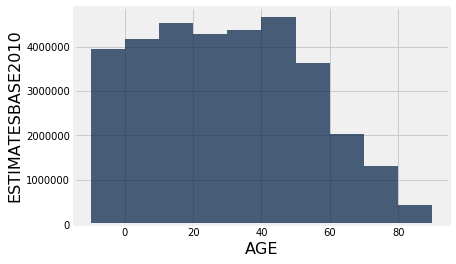

In [22]:
final_census_table.bar("AGE", "ESTIMATESBASE2010") 

You can also use the functino `barh()` instead of `bar()` in order to flip the bar graph horizontally. Sometimes, this makes for a cleaner visualization.

---

## Merging Tables

We are going to cover one more topic briefly that you will need to use in your project. We are going to look into how to merge two tables that have common information. This technique will be very valuable when the time comes for you to do your own analysis with your own data sets. 

We are going to read in a table with information about psychologists. We will call this new table `psych1`.

In [23]:
psych1 = Table.read_table("example-data/psych1.csv")
psych1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Psychologist,Birth Year
Freud,1856
Skinner,1904
Piaget,1896
Maslow,1908


### Adding rows

You may have another `table` that has the exact same columns and you just want to add the rows to what you already have. Let's read in another short `table` with a couple more psychologists:

In [24]:
psych2 = Table.read_table("example-data/psych2.csv")
psych2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Psychologist,Birth Year
Jung,1875
Erikson,190


Great! We see that this second table has the same columns as the first one. Merging these two tables would allow us to consolidate our information. We are going to use the "append" method to append the second table onto the first!

In [25]:
psych_merged = Table.copy(psych1)  # copying over the new_psych table to a new variable for the merged table
psych_merged.append(psych2)
psych_merged

Psychologist,Birth Year
Freud,1856
Skinner,1904
Piaget,1896
Maslow,1908
Jung,1875
Erikson,190


As you can see, we have succesfully merged these two tables together! Now, let us try merging an additional column onto the original `new_psych` table. 

### Adding columns

Let's pretend that we suddenly have access to the favorite foods of each psychologist. Wow! We definitely want to include that information in our table. This means that we need to merge in a new column to the initial table. Let us print the table first, and then we'll get the other column.

In [26]:
psych_merged

Psychologist,Birth Year
Freud,1856
Skinner,1904
Piaget,1896
Maslow,1908
Jung,1875
Erikson,190


Now we are going to create to read in our new information.

In [27]:
psych_foods = Table.read_table('example-data/favorite_food.csv')
psych_foods

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Favorite Food
Pizza
Snickers
Grapes
Escargot
Ice Cream
Apples


Luckily, we are going to assume that each row is in the right order in the column. We are going to use a similar process as before to merge this column! The method we now use is `append_column`. Otherwise, the format stays the same!

In [28]:
psych_merged_with_food = Table.copy(psych_merged)  # copying over the new_psych table to a new variable 
psych_merged_with_food.append_column("Favorite Food", psych_foods['Favorite Food'])
psych_merged_with_food

Psychologist,Birth Year,Favorite Food
Freud,1856,Pizza
Skinner,1904,Snickers
Piaget,1896,Grapes
Maslow,1908,Escargot
Jung,1875,Ice Cream
Erikson,190,Apples


As you can see, we've successfully merged a column to our table too!

### Joining on columns

Suppose now that you have more information on the these psycologists (another column), but the rows aren't in the right order so you can't just `append_column`. Luckily, you have their names. 

In [29]:
psych_birthplaces = Table.read_table("example-data/birthplaces.csv")
psych_birthplaces

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Psychologist,Birth Place
Maslow,New York
Erikson,Germany
Skinner,Pennsylvania
Piaget,Switzerland
Freud,Czech Republic
Jung,Switzerland


Awesome! We love more data, but how can I merge this back into our existing information? We can't just add a column because the order is different.

***Solution***: We can use the `join` method and tell it which column the two tables have in common, and it will match the data to the correct row:

In [30]:
final_table = psych_merged_with_food.join("Psychologist", psych_birthplaces)
final_table

Psychologist,Birth Year,Favorite Food,Birth Place
Erikson,190,Apples,Germany
Freud,1856,Pizza,Czech Republic
Jung,1875,Ice Cream,Switzerland
Maslow,1908,Escargot,New York
Piaget,1896,Grapes,Switzerland
Skinner,1904,Snickers,Pennsylvania


That's super cool!

---

## SUMMARY 

### You've learned a lot in this module! Let's look back on the key parts. 

- To import data from a .csv/.txt file, we write `Table.read_table("file_name")`.

- To create our own table, we write `Table( ).with_columns("Column Name", array_name, . . .)` . 

- To count number of rows, we use `table_name.num_rows`.

- To count number of columns, we use `table_name.num_columns`.

- To create a new table with only the columns indicated in the parameters, we use `table_name.select("COLUMN NAME", ...)`. 

- To create a new table without the columns indicated in the parameters, we use `table_name.drop("COLUMN NAME", ...)`. 

- To create a table with only certain values, we can use `table_name.where(column_name, predicate)`.

- To create a new table with indicated rows from the original table, we use `table_name.take([index 1, index 2, . . . ])`. Remember in Python indices start at 0!

- To create a scatter plot, we use `table.scatter(column for x axis, column for y axis)`.

- To create a line plot, we use `table.plot(x column, y column)`.

- To make a bar graphs, we can use either `table.bar(x column, y column)` or `table.barh(x column, y column)`. 

- To make a histogram, we use `table.hist(x axis, bins(optional), unit(optional))`. 

- To merge tables, we use either `append` or `append_column`.

- To merge two tables with a common column name we use the `join` method.

---

With just some simple code, we were able to do an incredible amount of data analysis! Play around with the examples until you feel comfortable with the content of this notebook. We will be using notebooks to analyze your own data sets in the future! Please ask if you have questions!


If you need help, please consult the [Data Peers](https://data.berkeley.edu/education/data-science-community)!